In [1]:
from base import *
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

from skfuzzy import cluster
from itertools import combinations
from xgboost import XGBClassifier

import scipy
from scipy.spatial import distance

In [10]:
TRAIN, TEST = read_data()

y_train = TRAIN['label'].values
y_test = TEST['label'].values

X_train = fill_na(TRAIN).drop(columns=['ID', 'label', 'speaker'])
X_test = fill_na(TEST).drop(columns=['ID', 'label', 'speaker'])

In [11]:
import joblib
model = joblib.load('M_chi2_100_fuzzy_.pkl')

In [12]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [13]:
print('TRAINING accuracy: ',accuracy_score(y_train, pred_train))
print('TEST accuracy: ',accuracy_score(y_test, pred_test))

TRAINING accuracy:  0.8960443174932918
TEST accuracy:  0.5502727981293842


In [14]:
print('REPORT: training set\n',classification_report(y_train, pred_train))

REPORT: training set
               precision    recall  f1-score   support

 barely-true       0.90      0.88      0.89      1894
       false       0.89      0.90      0.89      2261
   half-true       0.88      0.89      0.89      2371
 mostly-true       0.89      0.89      0.89      2217
  pants-fire       0.95      0.97      0.96       958
        true       0.90      0.88      0.89      1852

    accuracy                           0.90     11553
   macro avg       0.90      0.90      0.90     11553
weighted avg       0.90      0.90      0.90     11553



In [15]:
print('REPORT: test set\n',classification_report(y_test, pred_test))

REPORT: test set
               precision    recall  f1-score   support

 barely-true       0.54      0.50      0.51       214
       false       0.56      0.66      0.61       250
   half-true       0.55      0.59      0.57       267
 mostly-true       0.56      0.54      0.55       249
  pants-fire       0.64      0.65      0.65        92
        true       0.49      0.39      0.44       211

    accuracy                           0.55      1283
   macro avg       0.56      0.56      0.55      1283
weighted avg       0.55      0.55      0.55      1283



<Figure size 1000x700 with 0 Axes>

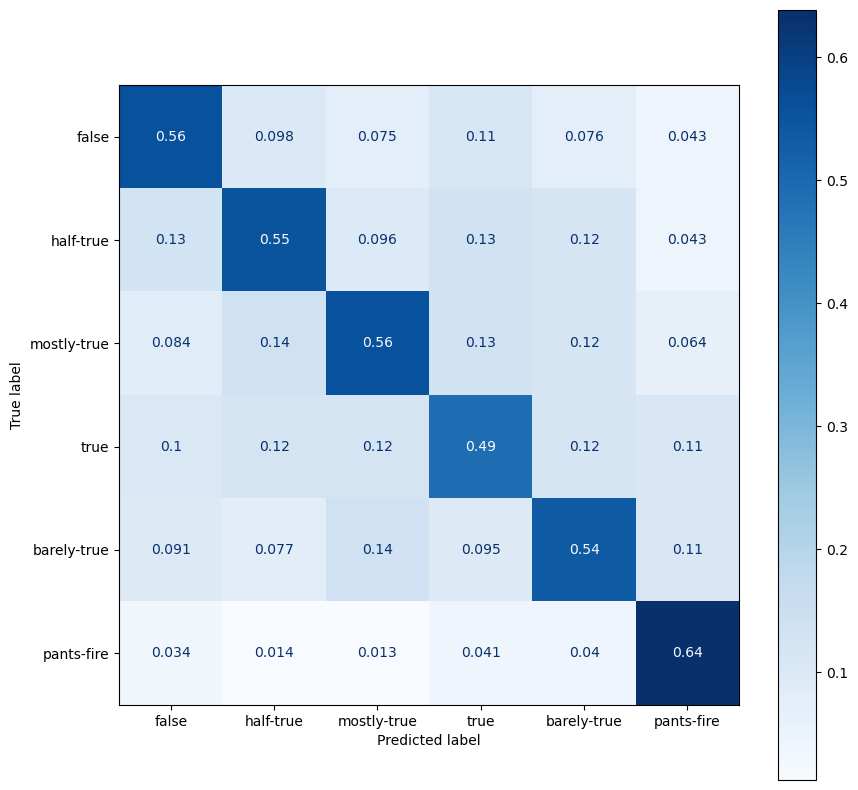

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

cm = confusion_matrix(y_test, pred_test, labels= TRAIN['label'].unique(), normalize='pred')
cmp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=TRAIN['label'].unique())
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(cmap = 'Blues', ax=ax);

In [22]:
model['Classifier'].model.best_params_

{'learning_rate': 0.5,
 'max_depth': 6,
 'n_estimators': 100,
 'objective': 'multi:softmax'}

In [24]:
for i in model['Union']['TXT']['TXT_binary'].models:
    print(i.best_params_)

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 100}


In [25]:
for i in model['Union']['CT']['CT_binary'].models:
    print(i.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
